# Rilsoft Movie Data Analysis and Market Insights for a New Studio

**Authors:** John, Wilber, Maureen,Stella, Isaiah
***

## Overview

Rilsoft aims to capitalize on the rising trend of movie creation by establishing a new studio. As newcomers to the industry, the team seeks to leverage data from leading movie review platforms to generate actionable insights that will guide their entry into the competitive movie-making landscape.

## Business Problem

Rilsoft wants to venture in the movie industry to compete with other big companies that create original video content. They have the challenge of determining optimal approach to the market. The problem is how to balance financial investment, creative vision and market demand.

***
## Objectives:
* To understand  high-performing movie genres and provide recommendations based on film genres with the highest ratings
* To understand revenue projections and ROI based on the  various movie genres.
* To help in analyzing the various roles for creative movie production

***

***
## Business Questions:
* Which movie genres consistently achieve the highest ratings and high ROI?
* What are the projected revenue and return on investment (ROI) across different movie genres for strategic decision making?
* What roles contribute to the success of high performing movie and movie genres?
* What insights can be derived from top-performing movie genres to inform Rilsoft movie studio production?
***

## Data Understanding

### Data Sources and Relevance

The data comes from several reputable sources in the movie industry, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets provide insights into various aspects of movie performance e.g BOM Detailed information on movie performances, release years, and industry statistics.These datasets collectively address questions about box office trends, movie profitability, audience preferences, and the relationship between budgets and revenue.Hence,the choice of datasets that would help us achieve the objectives are; the imdb dataset,bom.movie gross dataset and TN.movie budgets dataset

In [179]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

In [180]:
# Exploring IM.db table names
conn=sqlite3.connect('Datasets/im.db')

df_imdb = pd.read_sql("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""", conn)
cursor = conn.cursor()
df_imdb

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [181]:
#Viewing columns and data from the movie basic table
first_query = """SELECT * FROM movie_basics;"""
pd.read_sql(first_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [182]:
#Viewing columns and data from the person table
Querry = """SELECT * FROM persons;"""
pd.read_sql(Querry, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [183]:
#Viewing movie gross data and columns
df_gross=pd.read_csv('Datasets/bom.movie_gross.csv')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [184]:
# Checking for null values in the movie gross dataset
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [185]:
# Checking the column data types
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [186]:
#Importing tmdb.movies dataset
df2=pd.read_csv('Datasets/tmdb.movies.csv')
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [187]:
#Importing tn.movies dataset
df_budgets=pd.read_csv('Datasets/tn.movie_budgets.csv')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [188]:
#Importing rt.movie_info dataset
df4=pd.read_csv('Datasets/rt.movie_info.tsv', sep='\t')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [189]:
# Checking for null values
df4.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [190]:
#Importing rt.reviews dataset
df5=pd.read_csv('Datasets/rt.reviews.tsv', sep='\t', encoding='latin-1')
df5

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


#### Summary of the Various Variables in the Movie Datasets
The Target variables include but not limited to;
Revenue data (domestic_gross, foreign_gross, worldwide_gross).
Budget data (production_budget).
Popularity metrics (popularity, rating, vote_count).
Categorical information (studio, original_language,ages, genre_ids)

The dataset variables to be utilized here are both quantitative and qualitative(categorical)




## Data Preparation/Cleaning

In [191]:
#Select movies with their ratings
movie_ratings = ("""SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mr.averagerating, 
    mr.numvotes,
    mb.genres
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
""")
df_movie_ratings = pd.read_sql(movie_ratings,conn)
df_movie_ratings

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,7.0,77,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,One Day Before the Rainy Season,2019,7.2,43,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,6.9,4517,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,6.1,13,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,The Wandering Soap Opera,2017,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,6.2,6,Documentary
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,8.7,136,"Drama,Family"
73853,tt9914642,Albatross,Albatross,2017,8.5,8,Documentary
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,6.6,5,None


In [192]:
#Select relevant persons,professions involved in the movies
movie_ratings_1 = ("""
SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mb.genres,
    mr.averagerating, 
    mr.numvotes,
    dr.person_id,
    pr.primary_name,
    pr.primary_profession
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
JOIN known_for dr
ON mb.movie_id = dr.movie_id
JOIN persons pr
ON pr.person_id = dr.person_id
""")
df_movie_ratings_known_for = pd.read_sql(movie_ratings_1,conn)
df_movie_ratings_known_for

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...,...,...,...,...
526723,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,nm4394529,Ahmet Faik Akinci,"director,writer"
526724,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8,nm3980661,Jim Hurst,"camera_department,cinematographer,sound_depart..."
526725,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm1434828,Aleix Castellón,"production_manager,editorial_department,producer"
526726,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm3827360,Joan Amargós,actor


In [193]:
#checking for null values
df_movie_ratings.isna().sum()

movie_id            0
original_title      0
primary_title       0
start_year          0
averagerating       0
numvotes            0
genres            804
dtype: int64

No null values were found in the dataset

In [194]:
#Checking for duplicates
df_movie_ratings.duplicated().value_counts()

False    73856
dtype: int64

In [195]:
#summary statistics
df_movie_ratings.describe()

,start_year,averagerating,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [196]:
#data types
df_movie_ratings.dtypes

movie_id           object
original_title     object
primary_title      object
start_year          int64
averagerating     float64
numvotes            int64
genres             object
dtype: object

There are no duplicates in the dataset

In [197]:
#Get most popular genres based on number of votes:
pop_genres = ("""SELECT 
    mb.genres, 
    COUNT(mr.numvotes) AS total_votes,
    AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY total_votes DESC;""")
pop_genres_df = pd.read_sql(pop_genres,conn)

In [198]:
#checking for null values
pop_genres_df.isna().sum()

genres         1
total_votes    0
avg_rating     0
dtype: int64

In [199]:
#Replacing the null value with mode
pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)

In [200]:
#The null value has been replace by mode
pop_genres_df.isna().sum()

genres         0
total_votes    0
avg_rating     0
dtype: int64

In [201]:
#checking for duplicates
pop_genres_df.duplicated().value_counts()

False    924
dtype: int64

There are no duplicates on the dataset

In [202]:
#Summary Statistics
pop_genres_df.describe()

,total_votes,avg_rating
count,924.000000,924.000000
mean,79.930736,6.280216
std,569.601986,1.053560
min,1.000000,1.400000
25%,2.000000,5.683482
50%,5.000000,6.300000
75%,29.000000,6.973125
max,11612.000000,9.400000


In [203]:
# Converting the foreign gross column data to float, removing  string values
df_gross['foreign_gross']= df_gross['foreign_gross'].replace('[,\'NaN'']', '0', regex=True).astype(float)
print(df_gross.dtypes)
df_gross['foreign_gross'].fillna(df_gross['foreign_gross'].std(), inplace=True)
df_gross

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1.374106e+08,2018
3383,Edward II (2018 re-release),FM,4800.0,1.374106e+08,2018
3384,El Pacto,Sony,2500.0,1.374106e+08,2018
3385,The Swan,Synergetic,2400.0,1.374106e+08,2018


In [204]:
#Renaming the column movie to movie_title under the budgets data set
df_budgets.rename(columns={'movie': 'movie_title'}, inplace=True)

#Merging the movie ratings and budgets datasets
matched_df = df_movie_ratings.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,6.1,37886,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,6.0,6,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt8662424,Never Again,Never Again,2017,5.7,67,Drama,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793"
2634,tt8680254,Richard III,Richard III,2016,9.1,28,Drama,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334"
2635,tt8824064,Heroes,Heroes,2019,7.3,7,Documentary,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2636,tt8976772,Push,Push,2019,7.3,33,Documentary,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"


In [205]:
#Checking merged data from column titles
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year',
       'averagerating', 'numvotes', 'genres', 'id', 'release_date',
       'movie_title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [206]:
#Checking for null values
matched_df.isnull().sum()

movie_id             0
original_title       0
primary_title        0
start_year           0
averagerating        0
numvotes             0
genres               5
id                   0
release_date         0
movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

 No null values found

In [207]:
#Checking for duplicates 
matched_df.duplicated().value_counts()

False    2638
dtype: int64

No duplicates found

In [208]:
#Summary statistics
matched_df.describe()

,start_year,averagerating,numvotes,id
count,2638.000000,2638.000000,2.638000e+03,2638.000000
mean,2013.891205,6.241205,7.162586e+04,50.963230
std,2.554063,1.188941,1.375680e+05,28.458683
min,2010.000000,1.600000,5.000000e+00,1.000000
25%,2012.000000,5.600000,1.922500e+02,27.000000
50%,2014.000000,6.400000,1.335150e+04,51.000000
75%,2016.000000,7.100000,8.458400e+04,76.000000
max,2019.000000,9.300000,1.841066e+06,100.000000


In [209]:
#Removing string values from the budget and gross columns and converting to float data type
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_clean:
    matched_df[column] = matched_df[column].replace({'\\$': '', ',': ''}, regex=True).astype(float)

In [210]:
matched_df.dtypes

movie_id              object
original_title        object
primary_title         object
start_year             int64
averagerating        float64
numvotes               int64
genres                object
id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [211]:
#viewing the dataset
matched_df

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,None,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
3,tt0337692,On the Road,On the Road,2012,6.1,37886,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
4,tt4339118,On the Road,On the Road,2014,6.0,6,Drama,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt8662424,Never Again,Never Again,2017,5.7,67,Drama,47,"Jul 12, 2002",Never Again,500000.0,307631.0,308793.0
2634,tt8680254,Richard III,Richard III,2016,9.1,28,Drama,65,"Dec 29, 1995",Richard III,9200000.0,2684904.0,4199334.0
2635,tt8824064,Heroes,Heroes,2019,7.3,7,Documentary,12,"Oct 24, 2008",Heroes,400000.0,655538.0,655538.0
2636,tt8976772,Push,Push,2019,7.3,33,Documentary,70,"Feb 6, 2009",Push,38000000.0,31811527.0,49678401.0


In [212]:
#merging the known for dataset with the budgets dataset
matched_df_known_for = df_movie_ratings_known_for.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df_known_for


,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,"actor,writer,producer",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,"writer,miscellaneous",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm3388028,Loressa Clisby,"visual_effects,art_director,director",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
3,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm0330085,Chris M. Gordon,"editor,miscellaneous,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm1170333,Kacey Arnold,"miscellaneous,writer,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm6853305,Maura Corsini,actress,33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53592,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm7839151,Joe Knopp,"producer,actor",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53593,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm7968007,Parker Adams,"visual_effects,editor,editorial_department",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53594,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm8736182,Megan Harrington,"producer,miscellaneous",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"


In [213]:
#Checking for duplicates 
matched_df_known_for.duplicated().value_counts()

False    53596
dtype: int64

In [214]:
#Checking for null values
matched_df_known_for.isnull().sum()

movie_id                0
original_title          0
primary_title           0
start_year              0
genres                 21
averagerating           0
numvotes                0
person_id               0
primary_name            0
primary_profession    285
id                      0
release_date            0
movie_title             0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [215]:
# Dropping the null and missing values, there are number of professions data
matched_df_known_for = matched_df_known_for.dropna().drop_duplicates()
print(matched_df_known_for.isnull().sum())
print(matched_df_known_for.duplicated().value_counts())
matched_df_known_for.columns

movie_id              0
original_title        0
primary_title         0
start_year            0
genres                0
averagerating         0
numvotes              0
person_id             0
primary_name          0
primary_profession    0
id                    0
release_date          0
movie_title           0
production_budget     0
domestic_gross        0
worldwide_gross       0
dtype: int64
False    53290
dtype: int64


Index(['movie_id', 'original_title', 'primary_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'person_id', 'primary_name',
       'primary_profession', 'id', 'release_date', 'movie_title',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [216]:
#Removing string values known for dataset and converting to float data type
for column in columns_to_clean:
    matched_df_known_for[column] = matched_df_known_for[column].replace({'\\$': '', ',': ''}, regex=True).astype(float)

### Feature Engineering

In [217]:
#Calculating gross earnings
matched_df['gross_earnings'] = matched_df['worldwide_gross']-matched_df['production_budget']
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year',
       'averagerating', 'numvotes', 'genres', 'id', 'release_date',
       'movie_title', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'gross_earnings'],
      dtype='object')

In [218]:
# Saving the cleaned data to the folder
output_path = "Movies_data.csv"
matched_df.to_csv(output_path, index=False)

## Visualization

### Data Modeling

In [219]:
#Identifying correlation between variables with int or float data types
corr_df = matched_df.select_dtypes(include=['number'])
corr_df

,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,gross_earnings
0,2012,1.9,8248,26,45000000.0,0.0,73706.0,-44926294.0
1,2010,7.5,24,21,200000.0,1109808.0,1165996.0,965996.0
2,2015,6.1,14828,21,200000.0,1109808.0,1165996.0,965996.0
3,2012,6.1,37886,17,25000000.0,720828.0,9313302.0,-15686698.0
4,2014,6.0,6,17,25000000.0,720828.0,9313302.0,-15686698.0
...,...,...,...,...,...,...,...,...
2633,2017,5.7,67,47,500000.0,307631.0,308793.0,-191207.0
2634,2016,9.1,28,65,9200000.0,2684904.0,4199334.0,-5000666.0
2635,2019,7.3,7,12,400000.0,655538.0,655538.0,255538.0
2636,2019,7.3,33,70,38000000.0,31811527.0,49678401.0,11678401.0


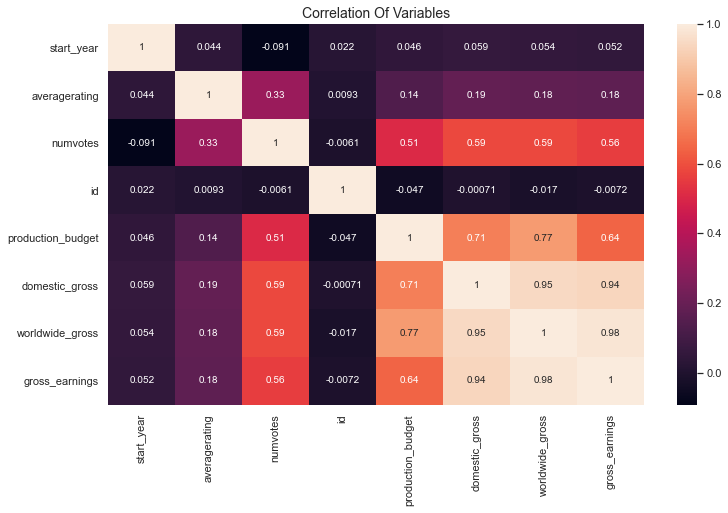

In [220]:
#Correlation plot
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Correlation Of Variables', fontsize=14)

corr = corr_df.corr()

sns.heatmap(corr, annot = True) 

plt.savefig('Correlation using Heatmap');

plt.show()


Variables with strong positive correlation are: production budget with both worldwide gross (0.77) and domestic gross(0.71)
Variables with weak positive correlation are: average rating with both both worldwide gross (0.18) and domestic gross(0.19)

In [221]:
# Get specific movie genres for accurate analysis(Some movies have more than one genre)
df_budget_genres = matched_df[['genres', 'production_budget', 'worldwide_gross', 'numvotes','gross_earnings']]
print(df_budget_genres.duplicated().value_counts())

False    2636
True        2
dtype: int64


In [222]:
# Use mean to get average between the duplicated rows
df_budget_genres = df_budget_genres.groupby('genres', as_index=False).mean()
print(df_budget_genres.duplicated().value_counts())
df_budget_genres

False    302
dtype: int64


,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,"Action,Adventure",4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,"Action,Adventure,Animation",1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
3,"Action,Adventure,Biography",8.375000e+07,2.254565e+08,236267.250000,1.417065e+08
4,"Action,Adventure,Comedy",8.234483e+07,3.379218e+08,208682.344828,2.555770e+08
...,...,...,...,...,...
297,"Sci-Fi,Thriller",1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
298,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
299,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
300,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [223]:
#Getting individual genres 
df_exploded = df_budget_genres.assign(genres=df_budget_genres['genres'].str.split(',')).explode('genres')
df_exploded


,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,Action,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
1,Adventure,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,Action,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
2,Adventure,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
...,...,...,...,...,...
297,Thriller,1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
298,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
299,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
300,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [224]:
#resetting index
df_exploded = df_exploded.reset_index(drop=True)
df_exploded

,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,Action,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,Adventure,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
3,Action,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
4,Adventure,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
...,...,...,...,...,...
790,Thriller,1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
791,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
792,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
793,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [225]:
#Summary statistics for budget by genre:
budget_stats = df_exploded.groupby('genres')['production_budget'].describe()
budget_stats

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,70.0,4.804199e+07,3.577022e+07,500000.0,2.037500e+07,4.200000e+07,6.237500e+07,1.563496e+08
Adventure,57.0,5.627934e+07,5.217009e+07,500000.0,1.536862e+07,4.000000e+07,8.375000e+07,2.316667e+08
Animation,14.0,5.522589e+07,4.382572e+07,5000000.0,2.203616e+07,4.303125e+07,7.843750e+07,1.450000e+08
Biography,32.0,2.743001e+07,2.127658e+07,500000.0,1.485536e+07,2.366474e+07,3.144318e+07,8.400000e+07
Comedy,75.0,2.765695e+07,2.076534e+07,900000.0,1.220000e+07,2.300000e+07,3.913167e+07,9.645946e+07
Crime,39.0,2.600301e+07,2.075530e+07,500000.0,9.450714e+06,2.446667e+07,3.950667e+07,9.000000e+07
Documentary,32.0,1.997831e+07,1.875209e+07,362500.0,5.604167e+06,1.520931e+07,2.719688e+07,6.800000e+07
Drama,124.0,2.659960e+07,2.556004e+07,500000.0,1.137304e+07,2.139098e+07,3.104167e+07,1.500000e+08
Family,32.0,3.862525e+07,3.548126e+07,350000.0,8.750000e+06,2.523750e+07,5.831250e+07,1.322750e+08


In [226]:
#Average budget per genre:
avg_budget_per_genre = df_exploded.groupby('genres')['production_budget'].mean().sort_values(ascending=False)
avg_budget_per_genre

genres
Adventure      5.627934e+07
Animation      5.522589e+07
Action         4.804199e+07
Fantasy        4.351616e+07
Sci-Fi         3.893618e+07
Family         3.862525e+07
Western        3.714500e+07
Musical        3.454028e+07
History        3.143423e+07
Sport          2.856333e+07
Comedy         2.765695e+07
Biography      2.743001e+07
Drama          2.659960e+07
Mystery        2.648097e+07
Crime          2.600301e+07
War            2.487967e+07
Thriller       2.303656e+07
Romance        2.014722e+07
Documentary    1.997831e+07
News           1.890000e+07
Horror         1.616780e+07
Music          1.584737e+07
Name: production_budget, dtype: float64

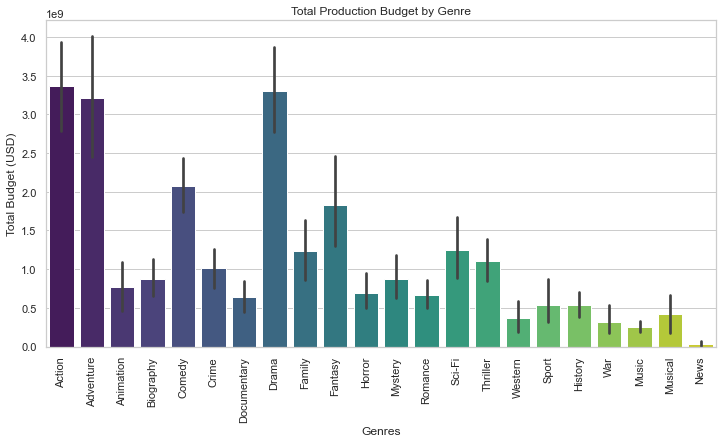

In [227]:
# Calculating the total production_budget per genre and sorting in descending order
df_genre_gross = df_exploded.groupby('genres', as_index=False)['production_budget'].sum()
df_genre_gross = df_genre_gross.sort_values(by='production_budget', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='production_budget', estimator=sum, palette="viridis")
plt.xticks(rotation=90)
plt.title('Total Production Budget by Genre')
plt.ylabel('Total Budget (USD)')
plt.xlabel('Genres')
plt.show()

Action, Adventure and Drama have the highest budget

In [228]:
#Average revenue per genre:
avg_worldwide_gross_per_genre = df_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)
avg_worldwide_gross_per_genre

genres
Adventure      1.832333e+08
Musical        1.796094e+08
Animation      1.701160e+08
Fantasy        1.420349e+08
Family         1.307622e+08
Sci-Fi         1.199147e+08
Action         1.160846e+08
Sport          1.131311e+08
Drama          8.100754e+07
Comedy         8.047069e+07
Mystery        7.543937e+07
Biography      7.141653e+07
Thriller       7.066527e+07
Western        6.325434e+07
Crime          5.647420e+07
History        5.492947e+07
Romance        5.222557e+07
Documentary    5.105460e+07
Music          4.789611e+07
War            4.685774e+07
Horror         4.385025e+07
News           3.165783e+07
Name: worldwide_gross, dtype: float64

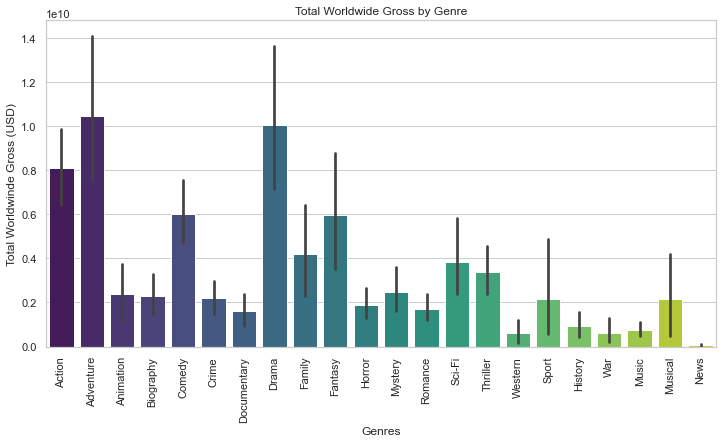

In [229]:
# Distribution of revenue across genres:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='worldwide_gross', estimator=sum, palette="viridis")
plt.xticks(rotation=90)
plt.title('Total Worldwide Gross by Genre')
plt.ylabel('Total Worldwinde Gross (USD)')
plt.xlabel('Genres')
plt.show()

Adventure followed by Drama then action have the highest worldwide gross

In [230]:
#Retrieving individual genres on the pop_genres dataset
pop_genres_df_exploded = pop_genres_df.assign(genres=pop_genres_df['genres'].str.split(',')).explode('genres')
pop_genres_df_exploded = pop_genres_df_exploded.reset_index(drop=True)
pop_genres_df_exploded

,genres,total_votes,avg_rating
0,Drama,11612,6.494265
1,Documentary,10313,7.293794
2,Comedy,5613,5.777998
3,Horror,2692,4.835475
4,Comedy,2617,6.364119
...,...,...,...
2532,Adventure,1,7.600000
2533,Sport,1,7.600000
2534,Action,1,8.700000
2535,Adventure,1,8.700000


In [231]:
#grouping the genres by total votes and average rating
pop_genres_df_exploded = pop_genres_df_exploded.groupby('genres')[['total_votes', 'avg_rating']].mean().sort_values(by='total_votes', ascending=False)
pop_genres_df_exploded['total_votes'] = pop_genres_df_exploded['total_votes'].round(0)
pop_genres_df_exploded

,total_votes,avg_rating
genres,,
Drama,143.0,6.396930
Documentary,103.0,7.279466
Comedy,93.0,6.211247
Thriller,65.0,6.063236
Horror,61.0,5.373191
Romance,54.0,6.189206
Action,51.0,6.019026
Biography,40.0,6.672649
Crime,40.0,6.089916


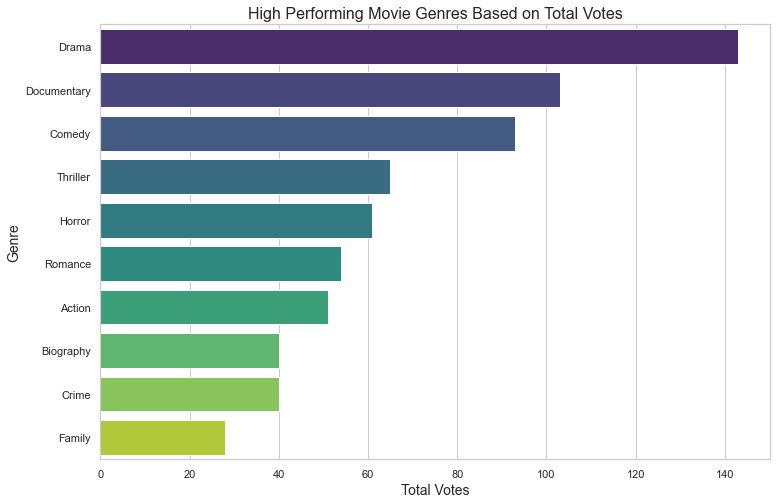

In [232]:
#Bar Graph showing high-performing movie genres
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='genres', data=pop_genres_df_exploded.reset_index().head(10), palette="viridis")

plt.title('High Performing Movie Genres Based on Total Votes', fontsize=16)
plt.xlabel('Total Votes', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

Drama, Documentary and Comedy received the highest number of votes
The only correlation between number of votes and revenue is in the Drama category
Hence lower correlation between number of votes and revenue

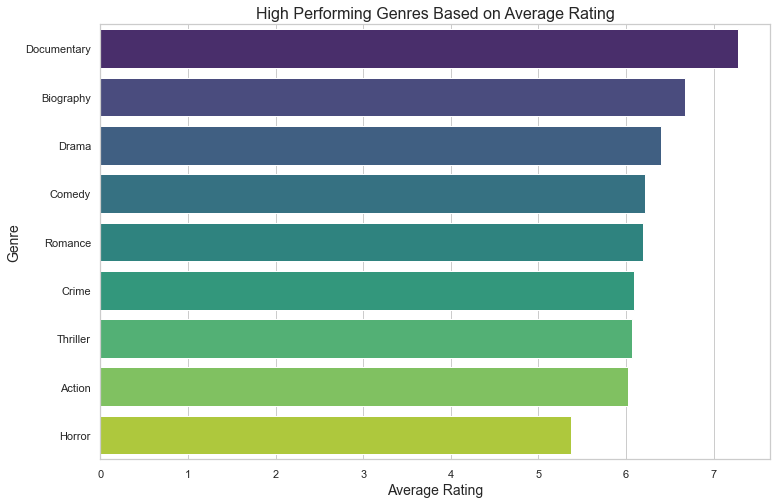

In [233]:
#Bar Graph showing high-performing movie genres

# Filter the rows where the number of votes is less than the average to avoid cases where a movie genre
# had 1 number of vote with a high rating
average_votes = pop_genres_df_exploded['total_votes'].mean()
filtered_df = pop_genres_df_exploded[pop_genres_df_exploded['total_votes'] >= average_votes]

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_rating', y='genres', data=filtered_df.reset_index().head(10).sort_values(by='avg_rating', ascending=False), palette="viridis")


plt.title('High Performing Genres Based on Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

Documentaries, Biographies and Drama have the highest rating based on the total number of votes
The Drama category stands out in all 4 variables i.e production budget, revenue, total votes and average rating

Documentary was the highest performing genre followed closely by biography and drama

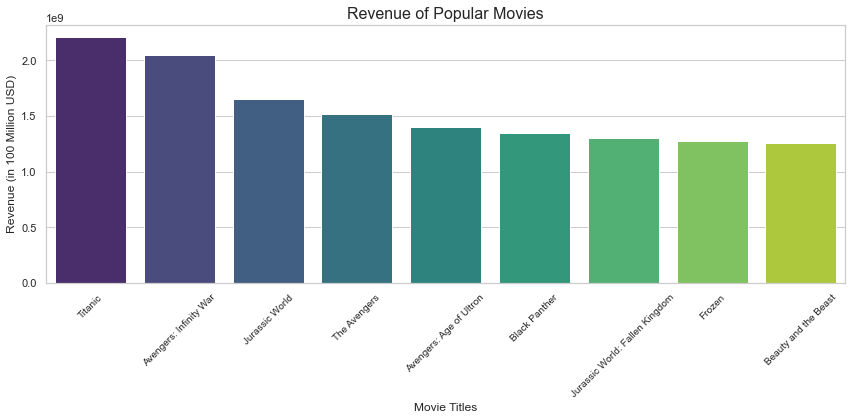

In [234]:
#Histogram to determine highest revenues of movie titles
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"worldwide_gross")

top_10_revenues = top_10_revenues.sort_values("worldwide_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="worldwide_gross", data=top_10_revenues, palette="viridis")


plt.title("Revenue of Popular Movies", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

There were several titles that generated high revenues with Titanic being the highest

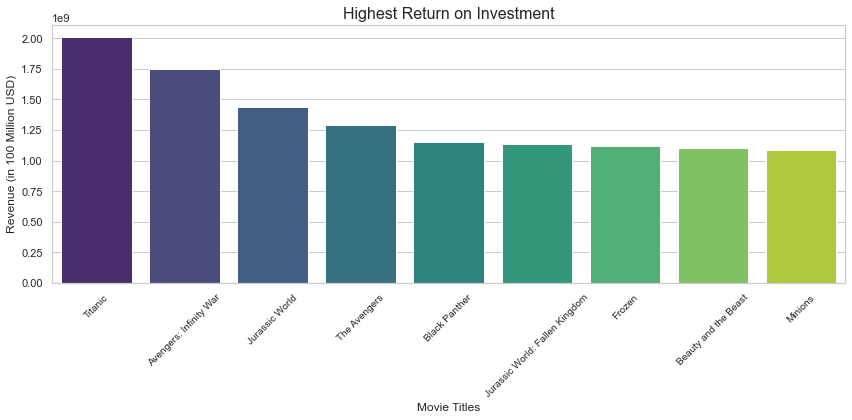

In [235]:
#Histogram to determine highest return on investment of movie titles
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"gross_earnings")

top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="gross_earnings", data=top_10_revenues, palette="viridis")


plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

The highest returns were still the movies with the highest revenue 

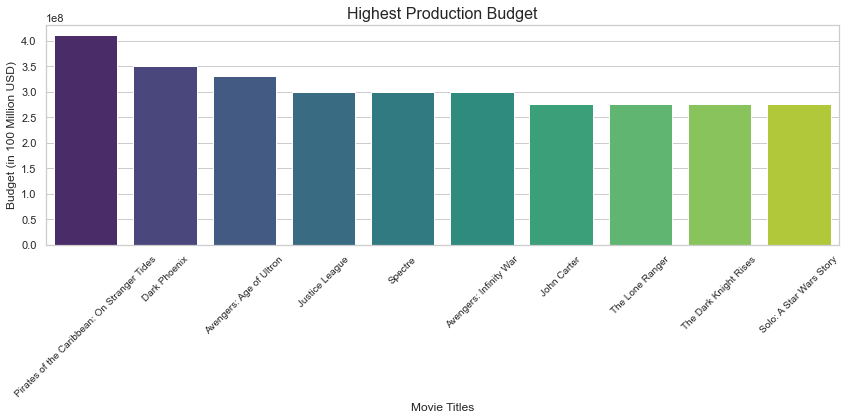

In [236]:
#Histogram to determine production budget of movie titles
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"production_budget")

top_10_revenues = top_10_revenues.sort_values("production_budget", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="production_budget", data=top_10_revenues, palette="viridis")


plt.title("Highest Production Budget", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Budget (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

High production budget do not necessarily equate revenue generation since very few titles appearing on the gross earnings are replicated here

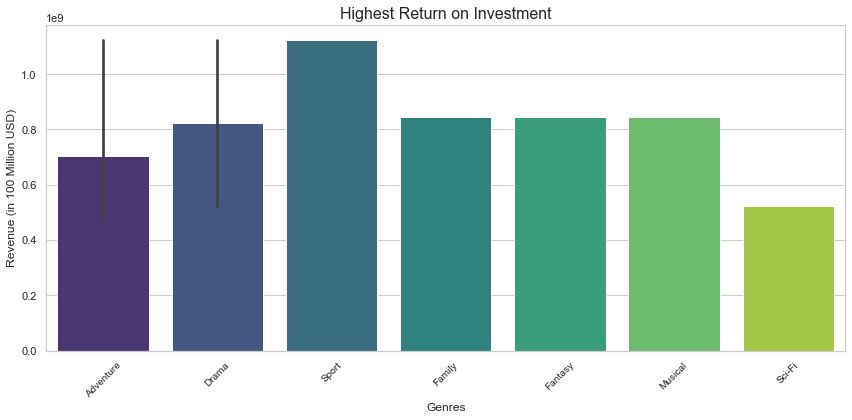

In [237]:
#Histogram to determine highest return on investment on genres
sns.set_theme(style="whitegrid")
top_10_revenues = df_exploded.nlargest(10,"gross_earnings")
top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="gross_earnings", data=top_10_revenues, palette="viridis")

plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Adventure, Drama and Sport brought the highest return on investment
Drama is among the top 3 on return on investment
Adventure had high budget, high revenue and also high ROI
Sport had low budget and high ROI

In [238]:
#Finding the mean of the budget and revenue variables
prod_wwwgross_df_exploded = df_exploded.groupby('genres')[['production_budget', 'worldwide_gross']].mean()
prod_wwwgross_df_exploded = prod_wwwgross_df_exploded.reset_index()
prod_wwwgross_df_exploded

,genres,production_budget,worldwide_gross
0,Action,4.804199e+07,1.160846e+08
1,Adventure,5.627934e+07,1.832333e+08
2,Animation,5.522589e+07,1.701160e+08
3,Biography,2.743001e+07,7.141653e+07
4,Comedy,2.765695e+07,8.047069e+07
5,Crime,2.600301e+07,5.647420e+07
6,Documentary,1.997831e+07,5.105460e+07
7,Drama,2.659960e+07,8.100754e+07
8,Family,3.862525e+07,1.307622e+08
9,Fantasy,4.351616e+07,1.420349e+08


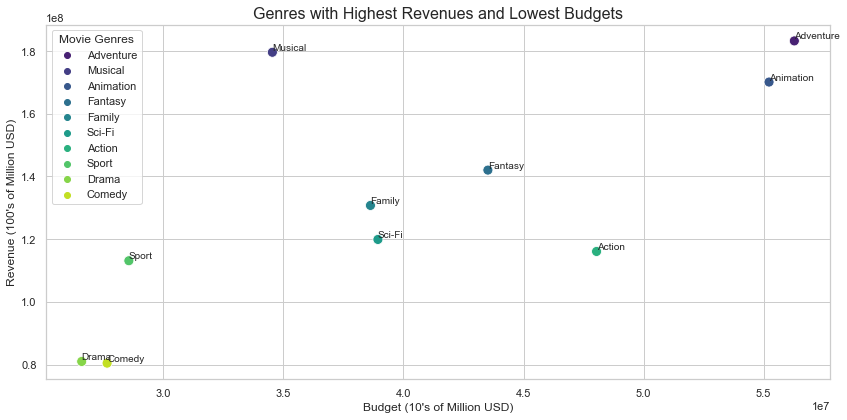

In [239]:
# Sorting by 'worldwide_gross' and 'production_budget' for visualization
df_sorted = prod_wwwgross_df_exploded.sort_values(by=["worldwide_gross", "production_budget"], ascending=[False, True]).head(10)


plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="production_budget", y="worldwide_gross", hue="genres", data=df_sorted, palette="viridis", s=100
)


for i in range(len(df_sorted)):
    plt.text(
        x=df_sorted["production_budget"].iloc[i] + 0.5, 
        y=df_sorted["worldwide_gross"].iloc[i], 
        s=df_sorted["genres"].iloc[i],  
        fontsize=10,  
        ha='left',  
        va='bottom' 
    )


plt.title("Genres with Highest Revenues and Lowest Budgets", fontsize=16)
plt.xlabel("Budget (10's of Million USD)", fontsize=12)
plt.ylabel("Revenue (100's of Million USD)", fontsize=12)
plt.legend(title="Movie Genres")
plt.tight_layout()

plt.show()


Musical has the highest revenue and the lowest budget cost

In [240]:
#Retrieving individual genres on the known for dataset
df_exploded_proffession = matched_df_known_for.assign(primary_profession=matched_df_known_for['primary_profession'].str.split(',')).explode('primary_profession')
df_exploded_proffession = df_exploded_proffession.reset_index(drop=True)
df_exploded_proffession

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,actor,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,writer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,producer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
3,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,writer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
4,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,miscellaneous,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132226,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm8736182,Megan Harrington,producer,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0
132227,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm8736182,Megan Harrington,miscellaneous,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0
132228,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm9855040,H. Adam Carter IV,editor,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0
132229,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm9855040,H. Adam Carter IV,editorial_department,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0


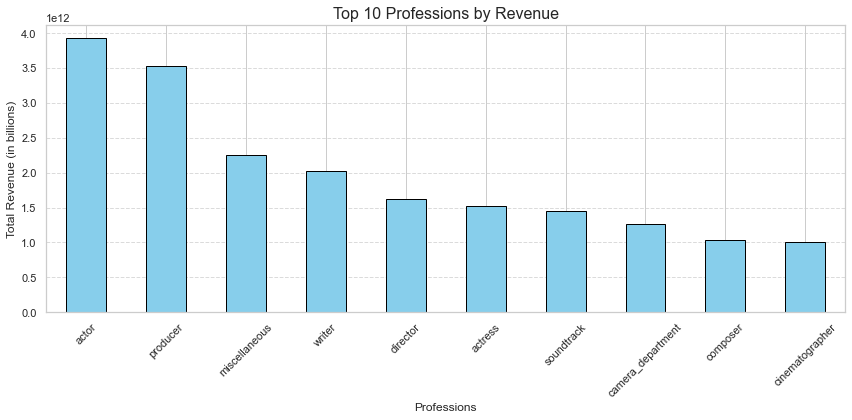

In [241]:
#Plotting the top 10 professions by revenue
director_revenue = df_exploded_proffession.groupby('primary_profession')['worldwide_gross'].sum().sort_values(ascending=False)


top_10_directors = director_revenue.head(10)


plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Top 10 Professions by Revenue', fontsize=16)
plt.xlabel('Professions', fontsize=12)
plt.ylabel('Total Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',
linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

The top performing professions are actor producer and writer

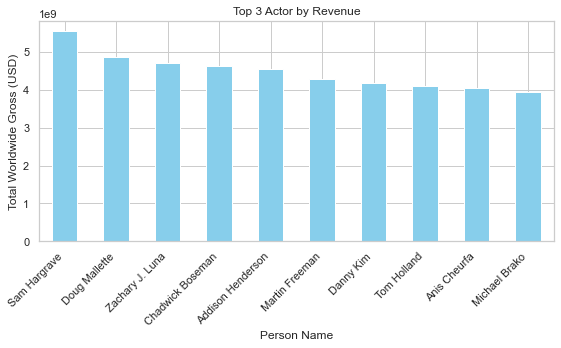

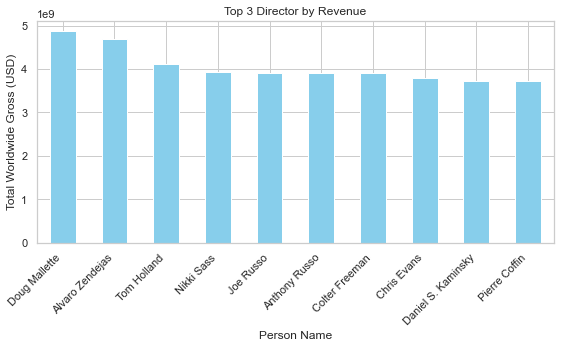

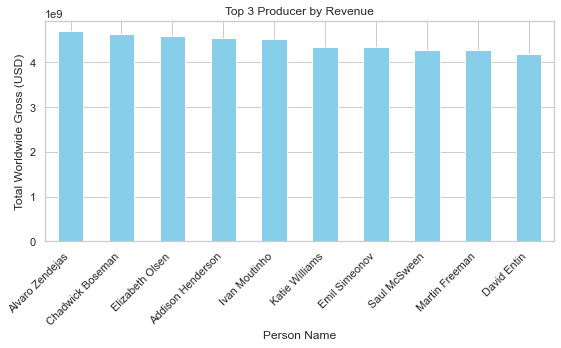

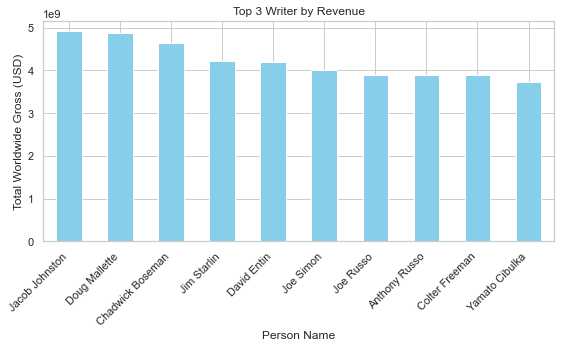

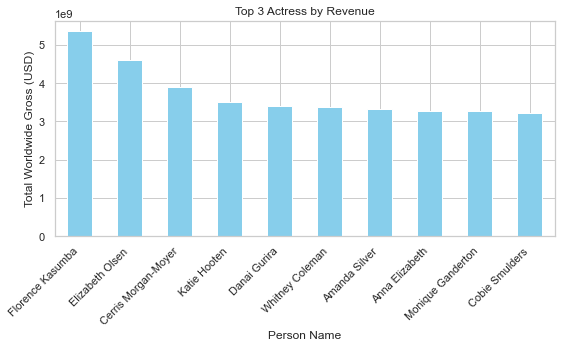

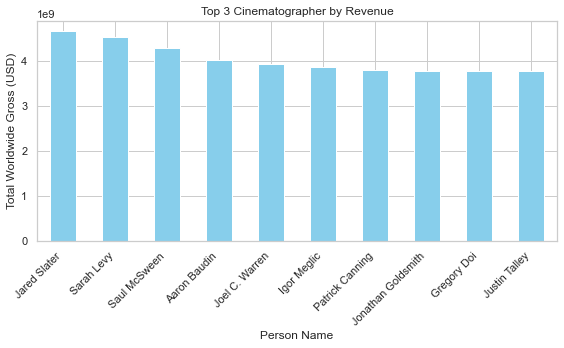

In [242]:
#Plotting the top 10 names in the highest performing professions by revenue
categories = ['actor', 'director', 'producer', 'writer', 'actress', 'cinematographer']


for category in categories:
    top_3 = (
        df_exploded_proffession[df_exploded_proffession['primary_profession'] == category] 
        .groupby('primary_name')['worldwide_gross'] 
        .sum()  
        .sort_values(ascending=False) 
        .head(10)
    )

   
    plt.figure(figsize=(8, 5))
    top_3.plot(kind='bar', color='skyblue')
    plt.title(f"Top 3 {category.capitalize()} by Revenue")
    plt.ylabel("Total Worldwide Gross (USD)")
    plt.xlabel("Person Name")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


The categories selected were based on the top 10 professions.
The top 10 names gives a variety of selection from the talent pool


In [243]:
#Viewing the unique professions
unique_professions = df_exploded_proffession['primary_profession'].value_counts()
unique_professions

producer                     19384
actor                        19198
writer                       11023
miscellaneous                10175
actress                       8824
director                      8585
soundtrack                    6916
camera_department             5803
composer                      5222
cinematographer               4853
music_department              4140
editor                        3711
art_department                2895
editorial_department          2824
visual_effects                2440
assistant_director            2302
stunts                        2011
production_manager            1964
production_designer           1605
sound_department              1557
executive                     1260
art_director                  1110
location_management            757
casting_department             639
animation_department           552
special_effects                427
casting_director               358
set_decorator                  353
make_up_department  

## Statistical Analysis

Analyzing the Distribution of Movie budgets  Across Genres

In [244]:
#Resetting the index 
df_exploded = df_exploded.reset_index(drop=True)

In [245]:
#Summary statistics for budget by genre:
budget_stats = df_exploded.groupby('genres')['production_budget'].describe()
budget_stats

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,70.0,4.804199e+07,3.577022e+07,500000.0,2.037500e+07,4.200000e+07,6.237500e+07,1.563496e+08
Adventure,57.0,5.627934e+07,5.217009e+07,500000.0,1.536862e+07,4.000000e+07,8.375000e+07,2.316667e+08
Animation,14.0,5.522589e+07,4.382572e+07,5000000.0,2.203616e+07,4.303125e+07,7.843750e+07,1.450000e+08
Biography,32.0,2.743001e+07,2.127658e+07,500000.0,1.485536e+07,2.366474e+07,3.144318e+07,8.400000e+07
Comedy,75.0,2.765695e+07,2.076534e+07,900000.0,1.220000e+07,2.300000e+07,3.913167e+07,9.645946e+07
Crime,39.0,2.600301e+07,2.075530e+07,500000.0,9.450714e+06,2.446667e+07,3.950667e+07,9.000000e+07
Documentary,32.0,1.997831e+07,1.875209e+07,362500.0,5.604167e+06,1.520931e+07,2.719688e+07,6.800000e+07
Drama,124.0,2.659960e+07,2.556004e+07,500000.0,1.137304e+07,2.139098e+07,3.104167e+07,1.500000e+08
Family,32.0,3.862525e+07,3.548126e+07,350000.0,8.750000e+06,2.523750e+07,5.831250e+07,1.322750e+08


#### Linear Regression

In [246]:
# Defining the variables 
X=matched_df[['production_budget','numvotes']]
y=matched_df['worldwide_gross']

In [247]:
# Adding constant
model = sm.OLS(y, sm.add_constant(X))
model

In [248]:
#Fitting the model
results=model.fit()
results

In [249]:
#Evaluation
results.fvalue, results.f_pvalue

(2456.429178831795, 0.0)

In [250]:
#Checking the goodness of the fit
results.rsquared

0.6508943497429841


The R-squared value of 0.6508 means the model explains about 65% of the variation in revenue using production budget and number of votes, other factors or adjustments might improve the fit.


In [251]:
#Constants
results.params

const               -1.498054e+07
production_budget    2.643436e+00
numvotes             3.744110e+02
dtype: float64

Intercept (const):
This represents the predicted revenue when both the production budget and number of votes are zero.

Production Budget Coefficient:
For every additional dollar increase in the production budget, the revenue increases by $2.64 on average, holding other factors constant.This shows a strong positive relationship between production budgets and revenue.

Number of Votes Coefficient:
For every 1-unit increase in the number of votes, the predicted revenue increases by $374.4 , holding other factors constant.This indicates that movies with more votes tend to generate significantly higher revenue.

In [252]:
#Confidence interval
print(results.conf_int())

                              0             1
const             -2.053522e+07 -9.425863e+06
production_budget  2.535836e+00  2.751035e+00
numvotes           3.368893e+02  4.119327e+02


In [253]:
#Summary 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2456.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:51:18   Log-Likelihood:                -52741.
No. Observations:                2638   AIC:                         1.055e+05
Df Residuals:                    2635   BIC:                         1.055e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.498e+07   2.83e+0

**Summary**

**Model fit based on data**

From the linear regression, the model explains about 65% of the variation in revenue using production budget and number of votes, other factors or adjustments might improve the fit.

**Significance:** Since none of the confidence intervals include 0, all three coefficients (intercept, production_budget, and numvotes) are statistically significant at the 95% confidence level.

**Practical Implications:**
The production budget has a clear and precise positive effect on revenue. For every dollar spent, revenue increases by a consistent multiplier.

The number of votes is also a significant factor, with a large impact per additional vote, which might reflect audience engagement or popularity translating to revenue.

if the dataset is limited (e.g., only includes movies from a specific region or time period), generalization may be limited.

**Model Summary**

We are confident with our model if subjected to new data, at a level of 65%.
***


## Evaluation

**Movie genres consistently achieve the highest ratings and high ROI**

The genres that consistently achieve the highest ratings and high ROI; Drama cut across both highest rating and high return on investment

**Projected revenue and return on investment (ROI) across different Movie genres for strategic decision making**

Adventure, Drama and Sport gave the highets return on investment.
Sport should be considered due to its low budget, Drama cuts across audiences as well as return, while Adventure will deliver the highest return but also with a high budget.
Musicals were also noted to have the lowest budget with the highest revenue

**Roles contributing to the success of high performing movies and movie genres**

The major roles were actors, producers,writers, directors and actresses

**Insights derived from top-performing movie genres to inform Rilsoft movie studio production**
1. The production budget, has a significant effect on revenue. Therefore for higher returns high budget is required.
2. The Drama category cuts across both the audiences as well as high return
3. The talents selected play a key role in success of the movies
4. Not all high budgets result in high revenues as seen in the case of Pirates of the Caribbean movie
5. The total number of votes per genre has a direct correlation with the revenue. More votes, more revenue.

***

## Conclusions


***

**Recommendations for the business**

The following genres are recommended;

Adventure, Sports and Drama.

Sport should be considered due to its low budget, Drama cuts across audiences as well as return, while Adventure will deliver the highest return but also with a high budget.

The following professions are recommended;

actors, producers,writers, directors and actresses with the top names being;

Actors; Sam Hargrave,  Doug Mallette, Zachary J. Luna, Chadwick Boseman

Producers; Alvaro Zendejas, Chadwick Boseman, Elizabeth Olsen

Writers; Jacob Johnston,  Doug Mallette, Chadwick Boseman

Directors; Doug Mallette, Alvaro Zendejas, Tom Holland

Actresses; Florence Kasumba, Elizabeth Olsen, Cerris Morgan-Moyer



**Reasons why the analysis might not fully solve the business problem**

There were some columns in datasets that had multiple null values hence could not be used to retrieve insights

The 65% fit of the model may affect accuracy

Variance in the data sets that were merged resulted in some loss of data



**Future input to improve the project**

To provide marketing insights, we would need to have domestic gross per country.

Continued analysis and adaptation to market trends to stay ahead of industry shifts

Geting insights based on demographics e.g. age, gender etc.

Include comments from critics

